<a href="https://colab.research.google.com/github/Joshmi-K-Joy/Bharat_Internship/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------- 1 -----------------------------------------------

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/enjoysport.csv')
data

,sky,airtemp,humidity,wind,water,forcast,enjoysport
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,cold,high,strong,warm,change,no
3,sunny,warm,high,strong,cool,change,yes


In [ ]:
concepts = np.array(data)[:,:-1]
concepts

array([['sunny', 'warm', 'normal', 'strong', 'warm', 'same'],
       ['sunny', 'warm', 'high', 'strong', 'warm', 'same'],
       ['rainy', 'cold', 'high', 'strong', 'warm', 'change'],
       ['sunny', 'warm', 'high', 'strong', 'cool', 'change']],
      dtype=object)

In [ ]:
target = np.array(data)[:,-1]
target

array(['yes', 'yes', 'no', 'yes'], dtype=object)

In [ ]:
def train(con, tar):
    for i, val in enumerate(tar):
        if val == 'yes':
            specific_h = con[i].copy()
            break

    for i, val in enumerate(con):
        if tar[i] == 'yes':
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x] = '?'
                else:
                    pass
    return specific_h

In [ ]:
print(train(concepts, target))

['sunny' 'warm' '?' 'strong' '?' '?']


----------------------------------------- 2 -------------------

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/enjoysport.csv')
concepts = np.array(data.iloc[:,0:-1])
print("\nInstances are:\n",concepts)


Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]


In [ ]:
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)


Target Values are:  ['yes' 'yes' 'no' 'yes']


In [ ]:
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

        print("Specific Bundary after ", i+1, "Instance is ", specific_h)
        print("Generic Boundary after ", i+1, "Instance is ", general_h)
        print("\n")

    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h

In [ ]:
s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")



Initialization of specific_h and genearal_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 
Specific Bundary after  1 Instance is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
Instance is Positive 
Specific Bundary after  2 Instance is  ['sunny' 'warm' '?' 'strong' 'warm' 'same']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?

--------------------------------- 4 ---------------------------

In [ ]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally y = y/100

In [ ]:
#Sigmoid Function
def sigmoid (x):
  return 1/(1 + np.exp(-x))

In [ ]:
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
  return x * (1 - x)


In [ ]:
#Variable initialization
epoch=5000	#Setting training iterations
lr=0.1	#Setting learning rate
inputlayer_neurons = 2	#number of features in data set
hiddenlayer_neurons = 3	#number of hidden layers neurons
output_neurons = 1	#number of neurons at output layer

In [ ]:
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))

In [ ]:
#draws a random range of numbers uniformly of dim x*y
for i in range(epoch):
  #Forward Propogation
  hinp1=np.dot(X,wh)
  hinp=hinp1 + bh
  hlayer_act = sigmoid(hinp)
  outinp1=np.dot(hlayer_act,wout)
  outinp= outinp1+ bout
  output = sigmoid(outinp)

  #Backpropagation
  EO = y-output
  outgrad = derivatives_sigmoid(output)
  d_output = EO* outgrad
  EH = d_output.dot(wout.T)

  #how much hidden layer wts contributed to error
  hiddengrad = derivatives_sigmoid(hlayer_act)
  d_hiddenlayer = EH * hiddengrad
  # dotproduct of nextlayererror and currentlayerop
  wout += hlayer_act.T.dot(d_output) *lr
  wh += X.T.dot(d_hiddenlayer) *lr

In [ ]:
print("Input: \n" + str(X))

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]


In [ ]:
print("Actual Output: \n" + str(y))

Actual Output: 
[[92.]
 [86.]
 [89.]]


In [ ]:
print("Predicted Output: \n" ,output)

Predicted Output: 
 [[0.99999852]
 [0.99999427]
 [0.99999859]]


-------------------------------------------------------- 8  --------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np


In [ ]:
iris = datasets.load_iris()

In [ ]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [ ]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

In [ ]:
colormap = np.array(['red', 'lime', 'black'])

Text(0, 0.5, 'Petal Width')

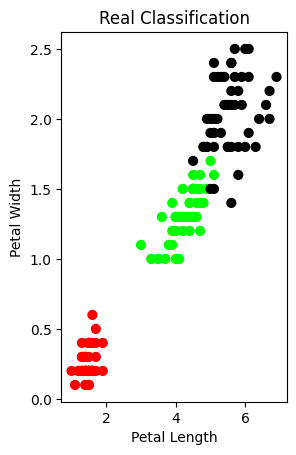

In [ ]:
# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of K-Mean:  0.32
The Confusion matrixof K-Mean:  [[ 0  0 50]
 [ 2 48  0]
 [36 14  0]]


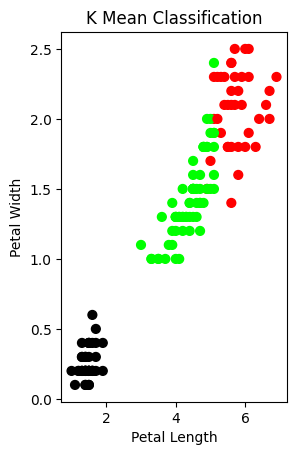

In [ ]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
#xs.sample(5)

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)
#y_cluster_gmm


Text(0, 0.5, 'Petal Width')

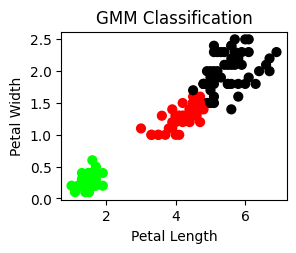

In [ ]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [ ]:
print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

The accuracy score of EM:  0.3333333333333333
The Confusion matrix of EM:  [[ 0 50  0]
 [45  0  5]
 [ 0  0 50]]


# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')